In [1]:
import numpy as np
import h5py
import pandas as pd
import sys
from scipy import io
import matplotlib.pyplot as plt
sys.path.insert(0, '../src')
sys.path.insert(0, 'src')
import utils
%matplotlib inline

trial_type = 'all'

lfads_filename = "/home/pmalonis/lfads_analysis/data/model_output/rockstar_8QTVEk_%s.h5"%trial_type
data_filename = "/home/pmalonis/lfads_analysis/data/intermediate/rockstar.p"
inputInfo_filename = "/home/pmalonis/lfads_analysis/data/model_output/rockstar_inputInfo.mat"


In [2]:
df = pd.read_pickle(data_filename)
input_info = io.loadmat(inputInfo_filename)
with h5py.File(lfads_filename) as h5file:
    co = h5file['controller_outputs'].value
    dt = utils.get_dt(h5file, input_info)

used_inds = utils.get_indices(input_info, trial_type)
targets = df.loc[used_inds].kinematic.query('hit_target')

(array([1987., 2272.,  179.,   88.,  119.,  269.,  168.,  109.,  179.,
         130.]),
 array([2.66666667e-04, 1.00073333e-01, 1.99880000e-01, 2.99686667e-01,
        3.99493333e-01, 4.99300000e-01, 5.99106667e-01, 6.98913333e-01,
        7.98720000e-01, 8.98526667e-01, 9.98333333e-01]),
 &lt;a list of 10 Patch objects&gt;)

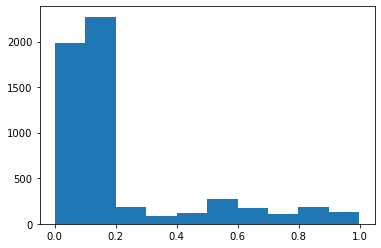

In [26]:
from scipy import signal

threshold = [0.4, 0.4] #minimum peak of input absolute value to consider
#threshold = 0.1
#input_idx = 1 #index of controller input to examine
win_start = 0.0 #start of window after target to include controller peak
win_stop = 1 #end of window after target to include controller peak
trial_len = co.shape[1] * dt 
t_lfads = np.arange(co.shape[1]) * dt #time labels of lfads input
all_peak_count = 0 # count of all controller peaks
target_peak_count = 0 # count of all peaks within window of target
latencies = [] # latency
for i in used_inds:
    peaks = []
    for input_idx in range(1):#range(co.shape[2]):
        input_peaks, _ = signal.find_peaks(np.abs(co[i, :, input_idx]), 
                        height=threshold[input_idx])
        peaks.append(input_peaks)

    peaks = np.concatenate(peaks)
    t_peaks = t_lfads[peaks]
    t_targets = targets.loc[i].index
    all_peak_count += len(t_peaks)
    for tp in t_peaks:
        if any((tp - t_targets >= win_start) & (tp - t_targets < win_stop)):
            diff_targets = tp - t_targets
            latency = np.min(diff_targets[diff_targets>0]) #latency to closest target
            latencies.append(latency)
            target_peak_count += 1

plt.hist(latencies)


In [27]:
print(all_peak_count)
print(target_peak_count)
print(targets.shape)

5734
5500


&lt;matplotlib.collections.LineCollection at 0x7f6e0c820f60&gt;

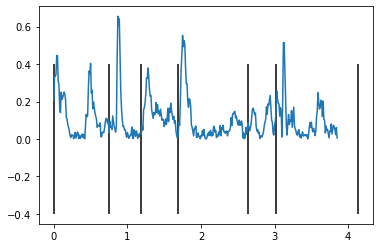

In [16]:
plt.plot(t_lfads, np.abs(co[i,:,0]))
plt.vlines(targets.loc[i].index, -.4, .4)

In [17]:
signal.find_peaks(np.abs(co[i,:,0]), height=0.3)

(array([  1,   5,  48,  50,  87,  89, 126, 128, 175, 177, 312]),
 {&#39;peak_heights&#39;: array([0.33506179, 0.44601279, 0.36225772, 0.40387553, 0.65520734,
         0.64128786, 0.32409567, 0.37939167, 0.55277157, 0.52604508,
         0.51489693])})